In [1]:
import tensorflow as tf
from tensorflow import keras 
from keras import Sequential


In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.9.2


In [4]:
# import the fashion data set from keras
fashion_data = keras.datasets.fashion_mnist
(training_image,training_label),(test_image,test_label) = fashion_data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
training_image.shape

(60000, 28, 28)

In [6]:
np.unique(training_label)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
# show image as matrix
training_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

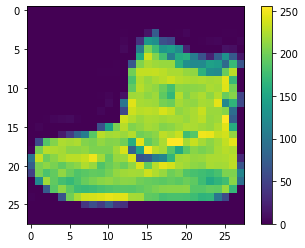

In [8]:
#show image
plt.figure()
plt.imshow(training_image[0])
plt.colorbar()
plt.show()

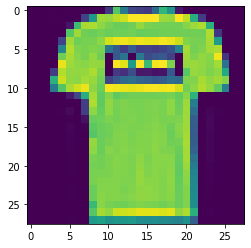

In [9]:
plt.figure()
plt.imshow(training_image[1])

In [10]:
#preprocessing data set
training_image = training_image/255
test_image=test_image/255

In [11]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

<ipython-input-12-21b6b50da451>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(5,5,i+1)


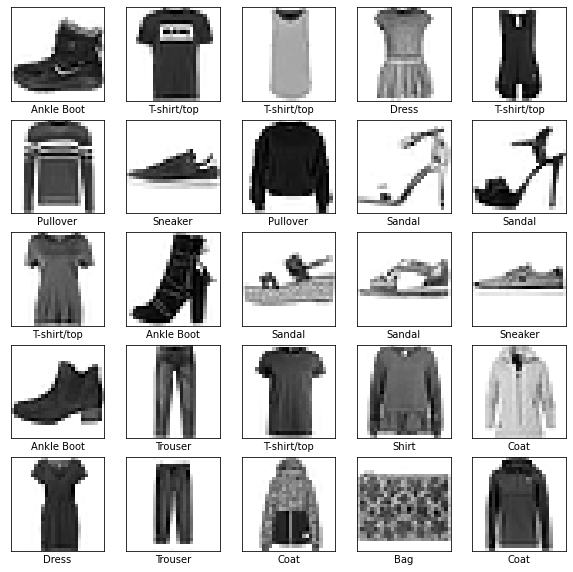

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('false')
    plt.imshow(training_image[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[training_label[i]])
    
plt.show()    

In [13]:
#vid 5  Set up the Neural Network Layers
# we have input layer and hidden layer and output layer 
# input layer is flatten layer convert convert two dimension array from (28,28) to one dimension array 784 * 1 = 28*28
# hidden layer is dense fully connected layer of (28 node==unit==neuron) (relU activation function)
# output layer is dense fully connected layer of (10 node==unit==neuron) (softmax activation function)
#building model of neural network consists of 3 layers input layer 1 hidden layer and output layer 
model = Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [14]:
# vid 6 TensorFlow Tutorial 6 - Compile the Model and optimize model
#we should know three things to complie model :
#1-loss function : measures how accurate the output is   compare y(actual output) and y'(predicted output)
#2-optimizer : measures how the model is updated >> update parameters w,b to get best loss function = cost function(j(w,b)) and get small error 
#3-metrics : monitors the training to determine when to stop 
## we will do it using compile our model using model.complie
# we will use adam optimizer
# we wiil use SparseCategoricalCrossentropy() function as loss function

model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [15]:
#vid 7 TensorFlow Tutorial 7 - Training the Model
#So an epoch refers to one cycle through the full training dataset
#Usually, training a neural network takes more than a few epochs. Increasing the number of epochs doesn’t always mean that the network will give better results.
# So basically, by trial-and-error, we choose several epochs at which the results still the same after a very few cycles.
model.fit(training_image,training_label,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4978 - accuracy: 0.8263
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3742 - accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3383 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3138 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2956 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2815 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2670 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2559 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2468 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.239

In [16]:

test_image.shape

(10000, 28, 28)

In [17]:
training_image.shape

(60000, 28, 28)

In [18]:
#vid 8 TensorFlow Tutorial 8 - Make Predictions Using the Model
# evaluate the model = test model  using test data set 
# using model.evaluate(x_test,y_test)
model.evaluate(test_image,test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.3305 - accuracy: 0.8882


[0.3304675817489624, 0.8881999850273132]

In [19]:
predictions = model.predict(test_image)


313/313 [==============================] - 1s 2ms/step


In [20]:
test_image.shape

(10000, 28, 28)

In [21]:
predictions.shape

(10000, 10)

In [22]:
predictions[0]

array([1.7058527e-06, 1.8673192e-10, 4.5157577e-08, 5.9081772e-12,
       1.9050690e-07, 7.0793014e-03, 7.0205219e-09, 2.5657667e-03,
       1.6398087e-07, 9.9035281e-01], dtype=float32)

<function matplotlib.pyplot.show(*args, **kw)>

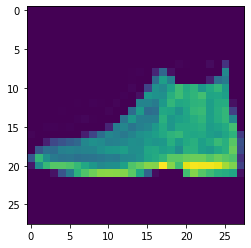

In [23]:
plt.figure()
plt.imshow(test_image[0])
plt.colorbar
plt.show

In [34]:
# vid 11 last video TensorFlow Tutorial 11 - Make Prediction on a Single Image
img = test_image[8]
img.shape

(28, 28)

In [35]:
img = (np.expand_dims(img,0))
img.shape

(1, 28, 28)

In [36]:
my_predictions = model.predict(img)
my_predictions



1/1 [==============================] - 0s 52ms/step


array([[9.3541168e-08, 3.9790951e-10, 8.0565193e-10, 2.0470393e-11,
        8.0074347e-10, 9.9999225e-01, 2.3084251e-10, 7.4667410e-06,
        1.3009540e-07, 2.0388506e-09]], dtype=float32)